In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [112]:
df = pd.read_csv("Placement_Data_Full_Class.csv")


In [113]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [115]:
df.drop(columns=['sl_no'] , inplace=True , axis = 1)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [117]:
list_of_columns = df.columns

In [118]:
for col in list_of_columns:
    print(col , df[col].unique())

gender ['M' 'F']
ssc_p [67.   79.33 65.   56.   85.8  55.   46.   82.   73.   58.   69.6  47.
 77.   62.   63.   60.   79.   69.8  77.4  76.5  52.58 71.   76.76 64.
 61.   87.   69.   51.   81.   78.   74.   49.   76.   70.89 50.   75.2
 54.4  40.89 80.   60.4  68.   52.6  84.2  86.5  54.   83.   80.92 69.7
 75.   84.86 64.6  56.6  59.   66.5  84.   81.7  70.   83.84 59.6  66.
 85.   52.   60.23 70.5  45.   61.08 69.5  73.96 68.2  60.8  72.   80.4
 76.7  74.9  77.44 77.67 89.4  44.   75.4  53.   51.57 55.6  74.2  67.16
 63.3  67.9  48.   59.96 63.4  73.24 77.8  56.28 88.   78.5  61.8  65.2
 83.96 54.2  55.68 41.   83.33 43.   80.6 ]
ssc_b ['Others' 'Central']
hsc_p [91.   78.33 68.   52.   73.6  49.8  49.2  64.   79.   70.   61.   68.4
 55.   87.   47.   75.   66.2  67.   66.   65.   76.   60.8  60.   97.7
 54.6  76.5  73.5  53.   81.   51.   78.   44.   58.   77.   63.16 39.
 73.   71.98 62.   37.   73.2  61.12 45.83 66.6  71.4  65.58 73.4  64.2
 74.   78.5  70.29 83.83 64.8  70.4  80

In [119]:
df.drop(columns=['salary'] , axis = 1  , inplace= True)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [121]:
for col in df.columns:
    if df[col].dtype == object:
        print(col , df[col].unique())

gender ['M' 'F']
ssc_b ['Others' 'Central']
hsc_b ['Others' 'Central']
hsc_s ['Commerce' 'Science' 'Arts']
degree_t ['Sci&Tech' 'Comm&Mgmt' 'Others']
workex ['No' 'Yes']
specialisation ['Mkt&HR' 'Mkt&Fin']
status ['Placed' 'Not Placed']


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


<AxesSubplot: ylabel='Count'>

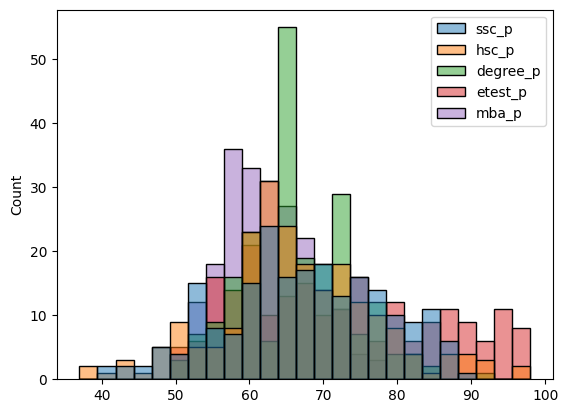

In [123]:
sns.histplot(df)

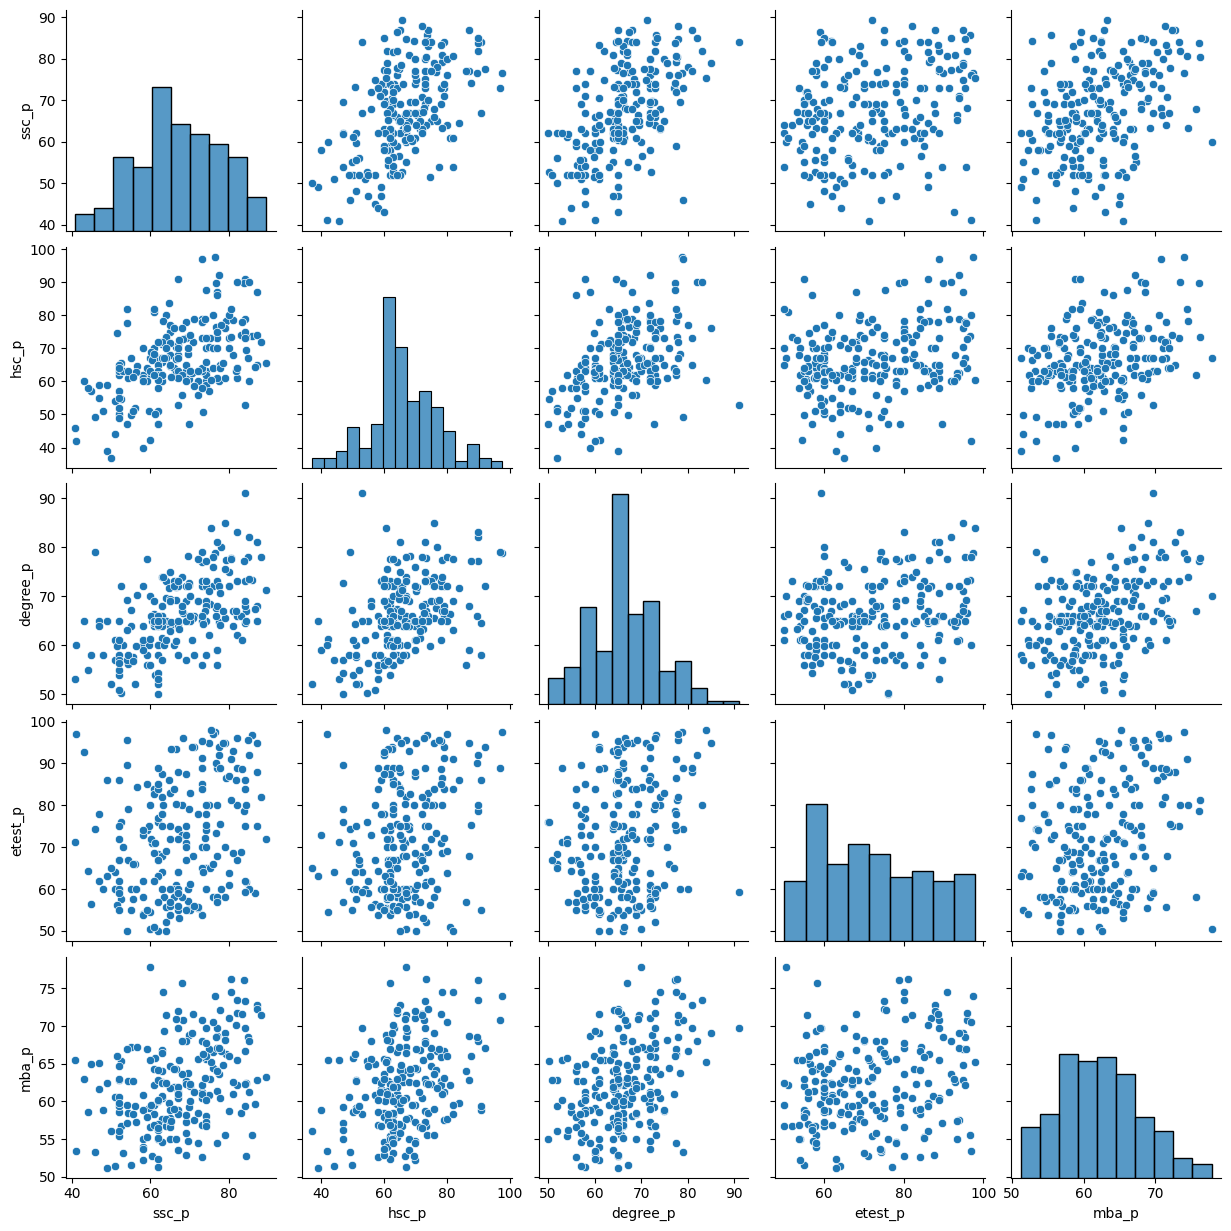

In [124]:
sns.pairplot(df)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


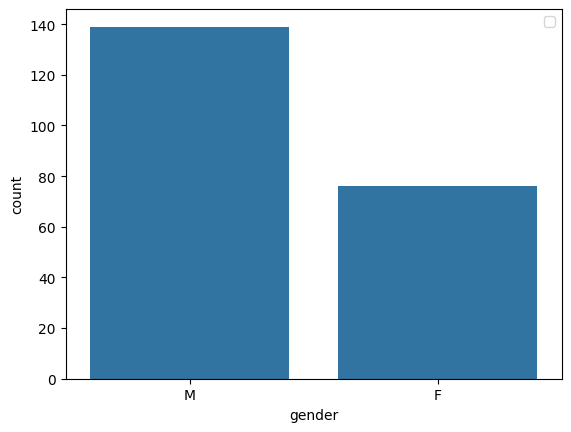

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


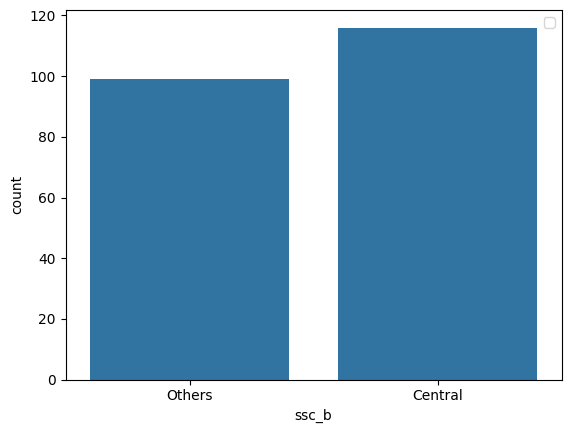

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


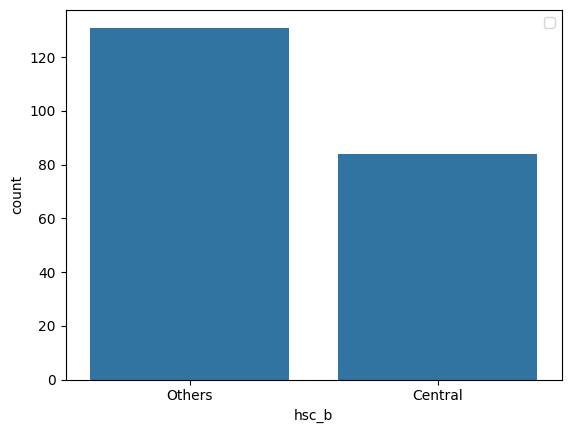

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


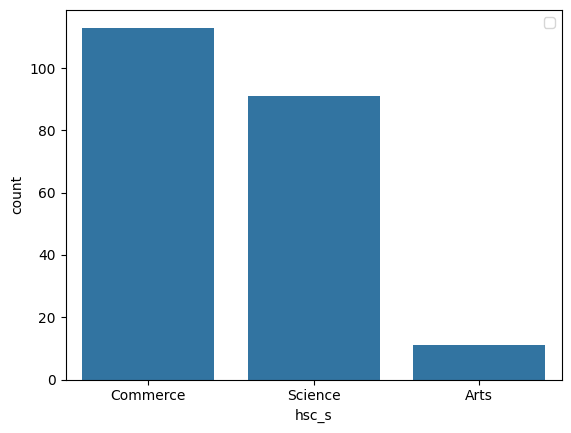

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


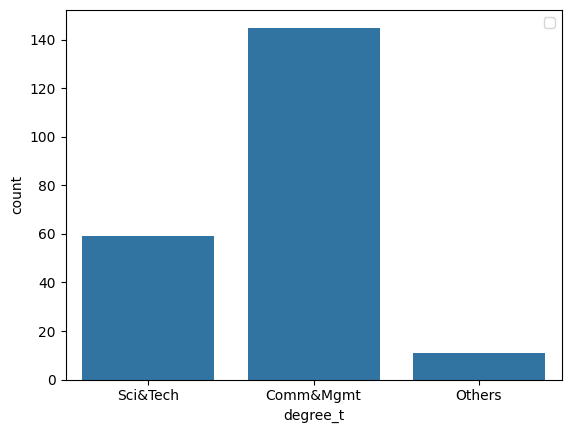

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


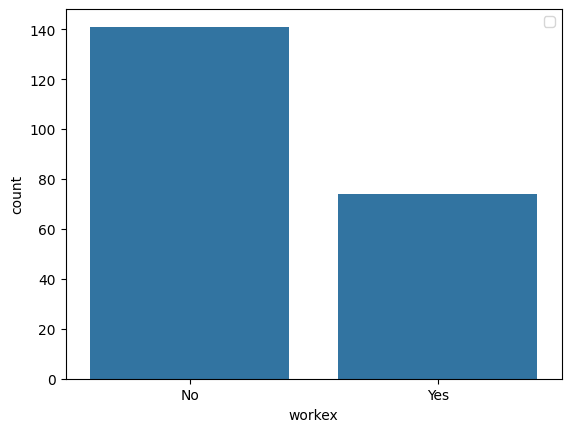

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


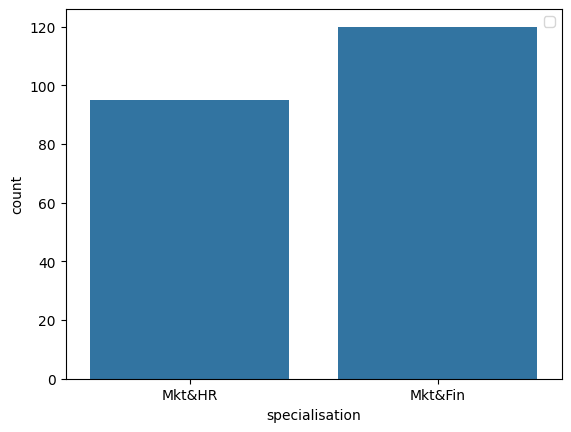

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


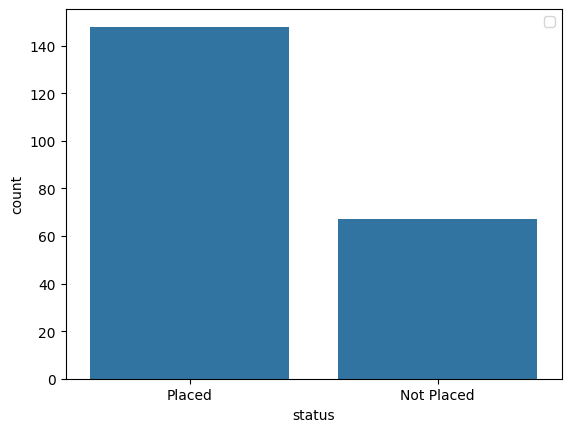

In [125]:
for col in df.columns:
    if df[col].dtype == object:
        sns.countplot(x = col , data=df)
        plt.legend()
        plt.show()

In [126]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [127]:
l_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == object:
        df[col] = l_encoder.fit_transform(df[col])

In [128]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


In [129]:
X = df.iloc[: , : -1].values
y = df['status'].values
print(X)
print(y)

[[ 1.   67.    1.   ... 55.    1.   58.8 ]
 [ 1.   79.33  0.   ... 86.5   0.   66.28]
 [ 1.   65.    0.   ... 75.    0.   57.8 ]
 ...
 [ 1.   67.    1.   ... 59.    0.   69.72]
 [ 0.   74.    1.   ... 70.    1.   60.23]
 [ 1.   62.    0.   ... 89.    1.   60.22]]
[1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0
 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0
 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0]


In [130]:
xtrain,xtest,ytrain,ytest = train_test_split(X , y , test_size=0.2 , random_state=42)

In [131]:
list_of_model_accuracy = []

for model in [gbc , bagc , abc , rfc , dtc , pac , svc , knn]:
    model.fit(xtrain , ytrain)
    ypred = model.predict(xtest)
    print(accuracy_score(ypred , ytest))  
    list_of_model_accuracy.append(accuracy_score(ypred , ytest))  
    

0.8372093023255814
0.7906976744186046
0.8604651162790697
0.7906976744186046
0.8372093023255814
0.7674418604651163
0.7674418604651163
0.7906976744186046


In [148]:
df_model = pd.DataFrame({
    'models':['gbc' , 'bagc' , 'abc' , 'rfc' , 'dtc' , 'pac' , 'svc' , 'knn'],
    'accuracy': list_of_model_accuracy
})

In [149]:
df_model

,models,accuracy
0,gbc,0.837209
1,bagc,0.790698
2,abc,0.860465
3,rfc,0.790698
4,dtc,0.837209
5,pac,0.767442
6,svc,0.767442
7,knn,0.790698


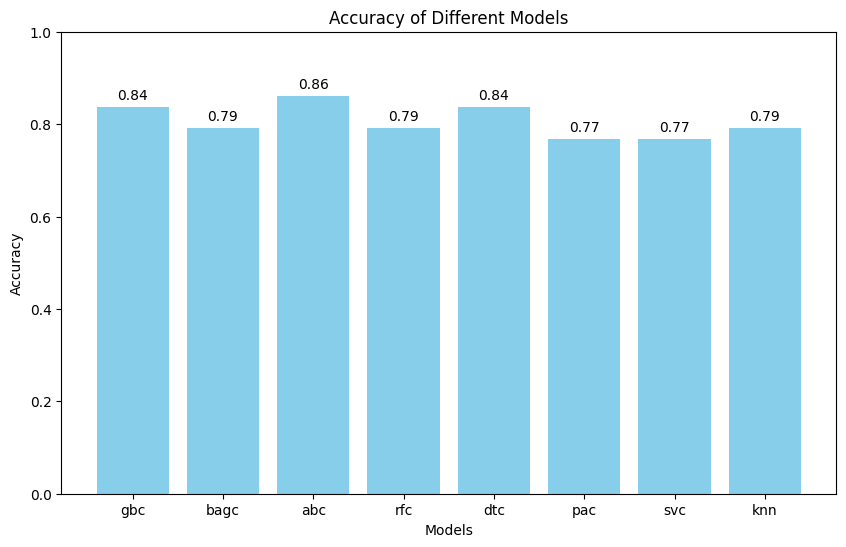

In [158]:
 
plt.figure(figsize=(10, 6))
plt.bar(df_model['models'], df_model['accuracy'], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1 (assuming accuracy is in the range [0, 1])

# Adding values on top of the bars
for i, value in enumerate(df_model['accuracy']):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()
